In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("MA.csv")
df.head()

,Unnamed: 0,x
0,1,2.926385
1,2,0.845785
2,3,2.697693
3,4,2.426607
4,5,1.833249


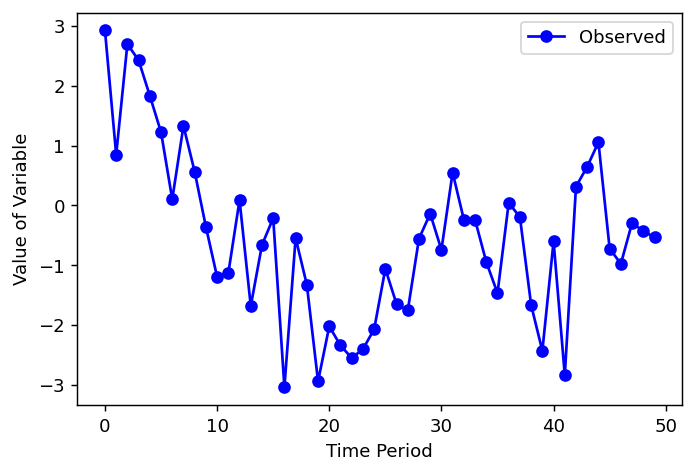

In [4]:
x = df["x"]

plt.figure(dpi=130)
plt.plot(x, marker = "o", color= "b")
plt.legend(["Observed"])
plt.xlabel("Time Period")
plt.ylabel("Value of Variable")
plt.show()

In [8]:
k = 3 #we skipped first 3 index value we started at 3. index to estimate 4. value
x_pred = np.full(x.shape, np.nan)

for i in range(k, len(x)):
    x_pred[i] = np.mean(x[(i-k):i])
    
x_pred

array([        nan,         nan,         nan,  2.15662099,  1.99002841,
        2.31918294,  1.82792834,  1.0528599 ,  0.88495105,  0.66432761,
        0.51086167, -0.33130941, -0.89600296, -0.74673873, -0.90894327,
       -0.75272085, -0.85365865, -1.30668877, -1.2672468 , -1.63843148,
       -1.6050957 , -2.09776901, -2.43607392, -2.30588963, -2.43313566,
       -2.34325805, -1.84655762, -1.59511787, -1.49008306, -1.32139011,
       -0.81764605, -0.4797242 , -0.11153781, -0.14433395,  0.0231234 ,
       -0.4753993 , -0.88558865, -0.79044814, -0.54052593, -0.60687774,
       -1.43263197, -1.56774959, -1.95880384, -1.04280358, -0.62639413,
        0.67219964,  0.32637733, -0.21499761, -0.66450863, -0.56740567])

In [11]:
k = 3
x_pred = x.rolling(k).mean() #same as for loop before
 
x_pred.shift(1)


0          NaN
1          NaN
2          NaN
3     2.156621
4     1.990028
5     2.319183
6     1.827928
7     1.052860
8     0.884951
9     0.664328
10    0.510862
11   -0.331309
12   -0.896003
13   -0.746739
14   -0.908943
15   -0.752721
16   -0.853659
17   -1.306689
18   -1.267247
19   -1.638431
20   -1.605096
21   -2.097769
22   -2.436074
23   -2.305890
24   -2.433136
25   -2.343258
26   -1.846558
27   -1.595118
28   -1.490083
29   -1.321390
30   -0.817646
31   -0.479724
32   -0.111538
33   -0.144334
34    0.023123
35   -0.475399
36   -0.885589
37   -0.790448
38   -0.540526
39   -0.606878
40   -1.432632
41   -1.567750
42   -1.958804
43   -1.042804
44   -0.626394
45    0.672200
46    0.326377
47   -0.214998
48   -0.664509
49   -0.567406
Name: x, dtype: float64

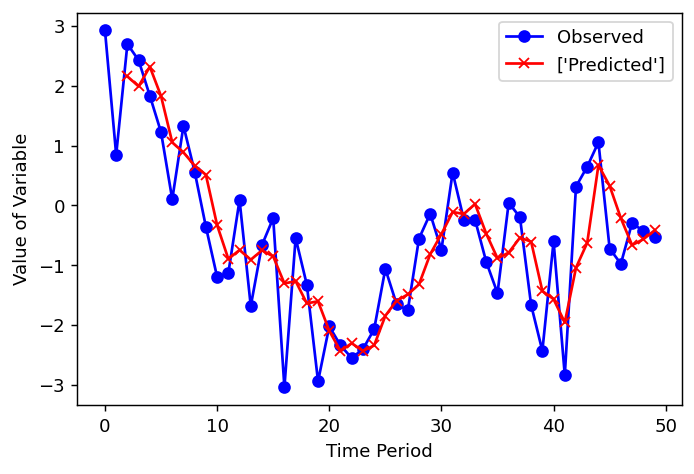

In [12]:
plt.figure(dpi=130)
plt.plot(x, marker = "o", color= "b")
plt.plot(x_pred, marker = "x", color= "r")
plt.legend(["Observed", ["Predicted"]])
plt.xlabel("Time Period")
plt.ylabel("Value of Variable")
plt.show()

In [13]:
def moving_average(x, k): #funtion of process above
    x_hat = np.full(x.shape, np.nan)
    for i in range(k, len(x)):
        x_hat[i] = np.mean(x[(i-k):i])
    return x_hat

x_pred = moving_average(x, 3)
x_pred

array([        nan,         nan,         nan,  2.15662099,  1.99002841,
        2.31918294,  1.82792834,  1.0528599 ,  0.88495105,  0.66432761,
        0.51086167, -0.33130941, -0.89600296, -0.74673873, -0.90894327,
       -0.75272085, -0.85365865, -1.30668877, -1.2672468 , -1.63843148,
       -1.6050957 , -2.09776901, -2.43607392, -2.30588963, -2.43313566,
       -2.34325805, -1.84655762, -1.59511787, -1.49008306, -1.32139011,
       -0.81764605, -0.4797242 , -0.11153781, -0.14433395,  0.0231234 ,
       -0.4753993 , -0.88558865, -0.79044814, -0.54052593, -0.60687774,
       -1.43263197, -1.56774959, -1.95880384, -1.04280358, -0.62639413,
        0.67219964,  0.32637733, -0.21499761, -0.66450863, -0.56740567])

In [15]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)
MSE(x, x_pred)

1.0299287087814082

In [16]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))
MAE(x, x_pred)

0.8074577258608746

In [17]:
def MAPE(y, y_pred):
    return 100*np.mean(np.abs(y - y_pred)/np.abs(y)) # yüzdelik değer çıkması  için 100 ile çarptık ör: 0.7 yerine %70
MAPE(x, x_pred)

214.5381795378886

In [19]:
def weighted_moving_average(x, w): #funtion of process above
    k=len(w)
    x_hat = np.full(x.shape, np.nan)
    
    for i in range(k, len(x)):
        x_hat[i] = np.sum(x[(i-k):i]*w)
    return x_hat

x_pred = weighted_moving_average(x, [0.5,0.3,0.2])
x_pred

array([        nan,         nan,         nan,  2.25646663,  1.71752182,
        2.44347836,  2.00806407,  1.30408341,  0.90828956,  0.56196939,
        0.76157948, -0.0660676 , -0.76499963, -0.9203428 , -0.87609284,
       -0.59335391, -1.08361211, -1.0044213 , -1.12882254, -1.95037032,
       -1.25932309, -1.95120134, -2.54675558, -2.22469691, -2.41784046,
       -2.412074  , -2.03665585, -1.68512981, -1.37770669, -1.46374912,
       -1.0735075 , -0.46854451, -0.18309153, -0.25493466,  0.15469296,
       -0.38068774, -0.69853268, -0.90517719, -0.76039199, -0.37070301,
       -1.08546304, -1.68416908, -1.96557276, -1.09048815, -1.19650456,
        0.5623524 ,  0.49536705,  0.11532105, -0.71332512, -0.66299351])

In [20]:
w = [0.5,0.3, 0.2]
print(w[::-1])

[0.2, 0.3, 0.5]
